<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Setup</h1>
</div> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Imports</h2>
</div>

In [1]:
# Standard Library 
import pickle

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing (scikit-learn)
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    OneHotEncoder, 
    OrdinalEncoder, 
    PolynomialFeatures
)
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform  # for random hyperparameter values

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb

# Model Evaluation: Regression
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_percentage_error, 
    r2_score
)

# Model Evaluation: Classification
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">CSV</h2>
</div>  

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Load data from a <code>.csv</code> file into a Pandas DataFrame.
</div>

In [2]:
try:
    df = pd.read_csv("data/train.csv")
    print("Train Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file content could not be parsed as a CSV.")
except PermissionError:
    print("Error: Permission denied when accessing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Train Data loaded successfully.


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Initial Data Inspection</h2>
</div> 

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Basic exploration of the dataset to understand its structure and detect obvious issues.
</div>

In [3]:
# Show DataFrame info to check the number of rows and columns, data types and missing values
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-

In [4]:
# Show top five rows of the data
df.head().style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': 'black',
    'border': '1px solid #dee2e6'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4e79a7'), ('color', 'white')]}
])

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.600000,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.000000,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.000000,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.000000,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.800000,2,3,3,Presence


<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Data Preprocessing</h1>
</div> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Standardizing Names and Labels</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    <strong>Column Names</strong> <br>
    📌 Convert all column names to snake_case for consistency, improved readability, and to minimize the risk of errors.
</div>

In [5]:
# Convert column names to snake_case
df.columns = (
    df.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r"[-/\s+]", "_", regex=True)  # Replace spaces and special characters with "_"
)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   age                      630000 non-null  int64  
 2   sex                      630000 non-null  int64  
 3   chest_pain_type          630000 non-null  int64  
 4   bp                       630000 non-null  int64  
 5   cholesterol              630000 non-null  int64  
 6   fbs_over_120             630000 non-null  int64  
 7   ekg_results              630000 non-null  int64  
 8   max_hr                   630000 non-null  int64  
 9   exercise_angina          630000 non-null  int64  
 10  st_depression            630000 non-null  float64
 11  slope_of_st              630000 non-null  int64  
 12  number_of_vessels_fluro  630000 non-null  int64  
 13  thallium                 630000 non-null  int64  
 14  heart_disease  

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    <strong>Categorical Labels</strong> <br>
    📌 Convert all categorical labels to snake_case for consistency, improved readability, and to minimize the risk of errors.
</div>

In [6]:
def standardize_categorical_labels(categorical_label):
    return (
        categorical_label
        .strip()  # Remove leading/trailing spaces
        .lower()  # Convert to lowercase
        .replace("-", "_")  # Replace hyphens with "_"
        .replace("/", "_")  # Replace slashes with "_"
        .replace(" ", "_")  # Replace spaces with "_"
    )


# Define categorical columns to standardize labels
columns_to_standardize = ["heart_disease"]

# Apply standardization of categorical labels
for column in columns_to_standardize:
    df[column] = df[column].apply(standardize_categorical_labels)


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Duplicates</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify duplicates based on:
<ul>
    <li><strong>All columns</strong>: To detect exactly identical rows.</li>
    <li><strong>ID column only</strong>: To ensure that no two rows share the same ID.</li>
    <li><strong>All columns except ID</strong>: To catch "hidden" duplicates where the same sample may have been recorded twice under different IDs.</li>
</ul>
</div>

In [7]:
# Identify duplicates based on all columns
df.duplicated().value_counts()

False    630000
Name: count, dtype: int64

In [8]:
# Remove duplicates
df = df.drop_duplicates(["id"]).copy()

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify and remove duplicates based on all columns except the ID column.
</div>

In [9]:
# Identify duplicates based on all columns except ID 
df.duplicated(subset=df.columns.drop("id"), keep=False).value_counts()

False    630000
Name: count, dtype: int64

In [10]:
# Remove duplicates
df = df.drop_duplicates(subset=df.columns.difference(['id'])).copy()

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Data Types</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify and convert incorrect storage data types.
</div>

In [11]:
# 1. Data Types
print(f"{' DATA TYPES ':=^50}")
print(df.dtypes)

# 2. Numerical Descriptive
print(f"\n{' NUMERICAL DESCRIPTIVE ':=^50}")
print(df.describe().loc[['min', 'max']].T.round(2)) 

# 3. Categorical Unique
print(f"\n{' CATEGORICAL UNIQUE VALUES ':=^50}")
for col in df.select_dtypes(include="object").columns:
    print(f"Variable: {col:20} | Uniques: {df[col].nunique()}")
    print(f"Values  : {df[col].unique()}\n")
print("="*50)

=================== DATA TYPES ===================
id                           int64
age                          int64
sex                          int64
chest_pain_type              int64
bp                           int64
cholesterol                  int64
fbs_over_120                 int64
ekg_results                  int64
max_hr                       int64
exercise_angina              int64
st_depression              float64
slope_of_st                  int64
number_of_vessels_fluro      int64
thallium                     int64
heart_disease                  str
dtype: object

============= NUMERICAL DESCRIPTIVE ==============
                           min       max
id                         0.0  629999.0
age                       29.0      77.0
sex                        0.0       1.0
chest_pain_type            1.0       4.0
bp                        94.0     200.0
cholesterol              126.0     564.0
fbs_over_120               0.0       1.0
ekg_results                0.0

/tmp/ipykernel_3196/4181410217.py:11: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include="object").columns:


In [12]:
# Convert column from object to boolean
df["heart_disease"] = df["heart_disease"].map({"presence": 1, "absence": 0})
df.head()

,id,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Statistical Analysis</h2>
</div>

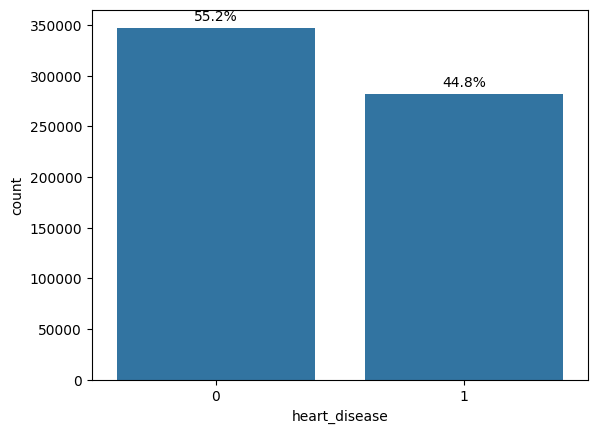

In [ ]:
# count of heart_disease
ax = sns.countplot(x='heart_disease', data=df)

total = len(df)
labels = [f'{(v.get_height()/total)*100:.1f}%' for v in ax.containers[0]]

ax.bar_label(ax.containers[0], labels=labels, padding=3)

plt.show()

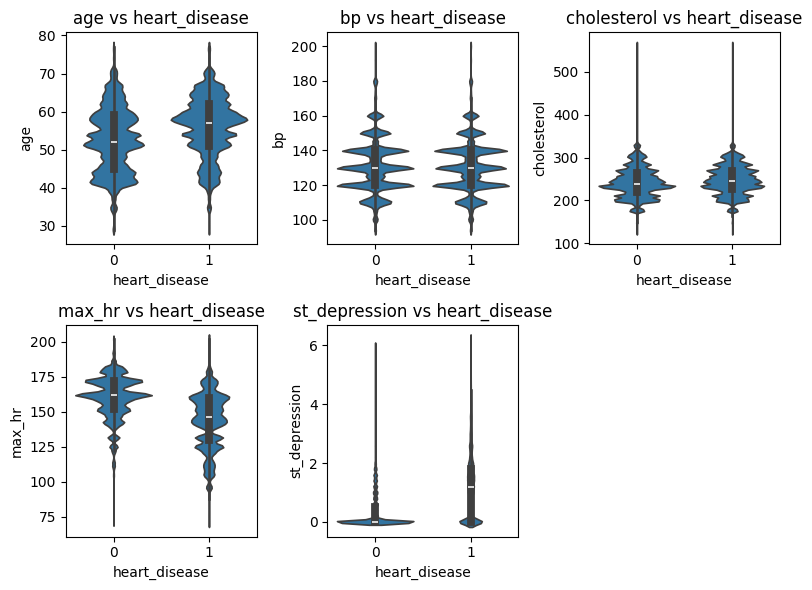

In [ ]:
# Violinplot X (nontinuous numerical columnds) vs Y (heart_disease)
numeric_columns =[x for x in df.columns if df[x].nunique() > 10 and x != "id"]

fig, axes = plt.subplots(2,3, figsize = (8,6))
for i, ax in enumerate(axes.flatten()):

    if i < len(numeric_columns):
        sns.violinplot(x = "heart_disease",data = df, y =numeric_columns[i], ax=ax)
        ax.set_title(f"{numeric_columns[i]} vs heart_disease")
        ax.set_ylabel(numeric_columns[i])
        ax.set_xlabel("heart_disease")
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()


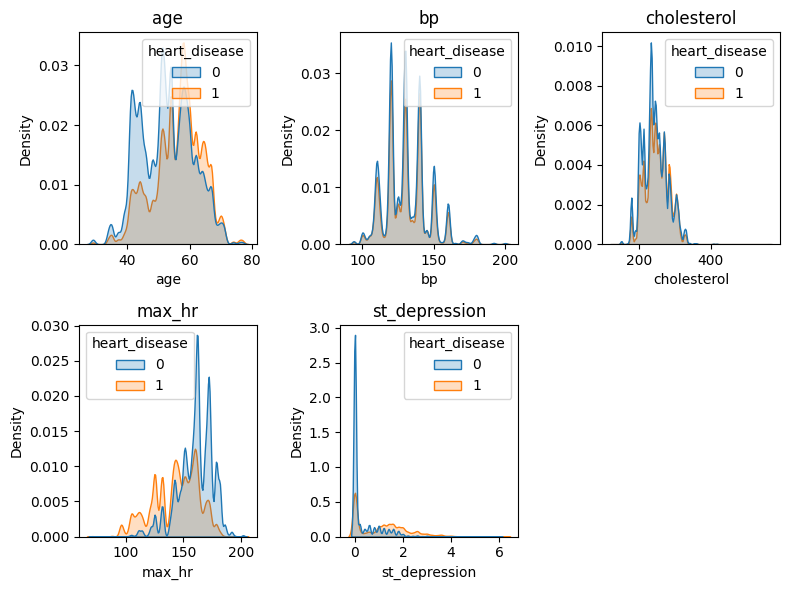

In [20]:
#KDEplot 

fig, axes = plt.subplots(2,3, figsize = (8,6))
for i, ax in enumerate(axes.flatten()):

    if i < len(numeric_columns):
        sns.kdeplot(data= df, x = numeric_columns[i], hue = "heart_disease", ax= ax, fill = True)
        ax.set_title(numeric_columns[i])
        ax.set_xlabel(numeric_columns[i])
        ax.set_ylabel("Density")
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


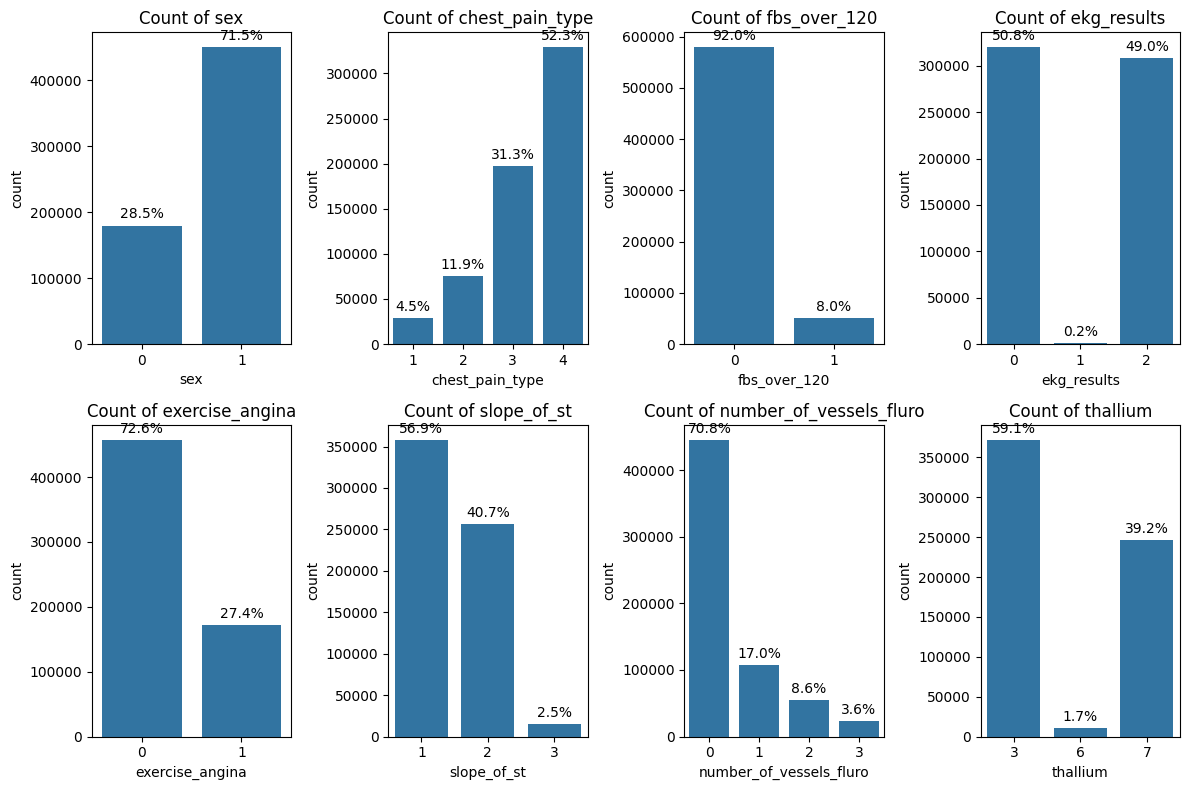

In [ ]:
#Countplot for non-continuos numeric columns
categorical_ordinal_columns = [x for x in df.columns if x not in numeric_columns and x != "id" and x!= "heart_disease"]

fig, axes = plt.subplots(2,4, figsize= (12,8))

for i, ax in enumerate(axes.flatten()):
    
    ax1 = sns.countplot(data = df, x = categorical_ordinal_columns[i], ax= ax)
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in ax1.containers[0]]
    ax1.bar_label(ax1.containers[0], labels = labels, padding = 3)

    ax.set_title(f"Count of {categorical_ordinal_columns[i]}")
    
plt.tight_layout()
plt.show()


    

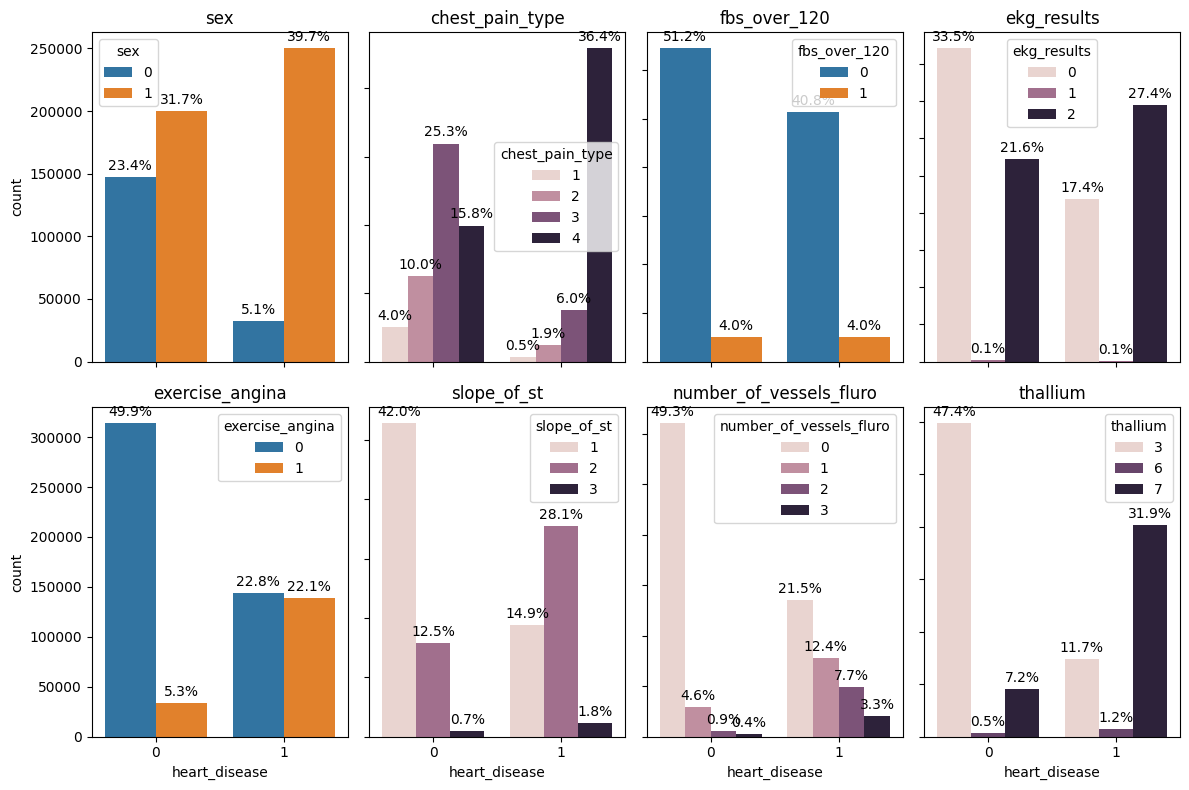

In [31]:
#gruped barplot for every categorical column

categorical_ordinal_columns = [x for x in df.columns if x not in numeric_columns and x != "id" and x!= "heart_disease"]

fig, axes = plt.subplots(2,4, figsize = (12,8))

for i, ax in enumerate(axes.flatten()):

    grouped = df.groupby(["heart_disease", categorical_ordinal_columns[i]]).agg(
    count = (categorical_ordinal_columns[i], "count")
    )

    ax1 = sns.barplot(x = "heart_disease",
                data = grouped,
                y = "count", 
                hue = categorical_ordinal_columns[i],
                ax=ax)
    for container in ax1.containers:
        labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
        ax.bar_label(container, labels = labels, padding=3)
    ax.set_title(categorical_ordinal_columns[i])
    ax.label_outer()  
plt.tight_layout()
plt.show()


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Train-Validation-Test Split</h2>
</div>

In [17]:
# Split the data into X features and y target
X = df.drop("heart_disease", axis=1)
y = df["heart_disease"]

In [18]:
# Split the data into training and temporary sets (70% train, 30% temporary)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Delete the temporary data to free up memory
del x_temp, y_temp

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Engineering New Features</h2>
</div> 

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    ℹ️ Derive a new feature from a raw text column or a categorical text column.
</div>

In [19]:
y_train.head()

445840    0
468919    0
237423    0
443580    0
295133    0
Name: heart_disease, dtype: int64